In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Integrator(dt, sympletic:bool, ax=None):
    # q and p vector at t=0
    qp0=np.array([[1],
                  [0]])
    if sympletic:
        M=np.array([[1-dt**2, dt],
             [-dt, 1]])
    else: 
        M=np.array([[1, dt],
             [-dt, 1]])
    Nt = int(10/dt)
    qps = np.zeros((2, Nt))
    qps[:,[0]]=qp0

    # Integrator
    for i in range(1,Nt):
        qps[:,[i]] = np.dot(M,qps[:,[i-1]])

    H=1/2*(qps[1]**2+qps[0]**2)
    Hprime = 1/2*(qps[1]**2+qps[0]**2)-dt/2*qps[0]*qps[1]
    
    return qps, H, Hprime

# Integrate and plot phase space

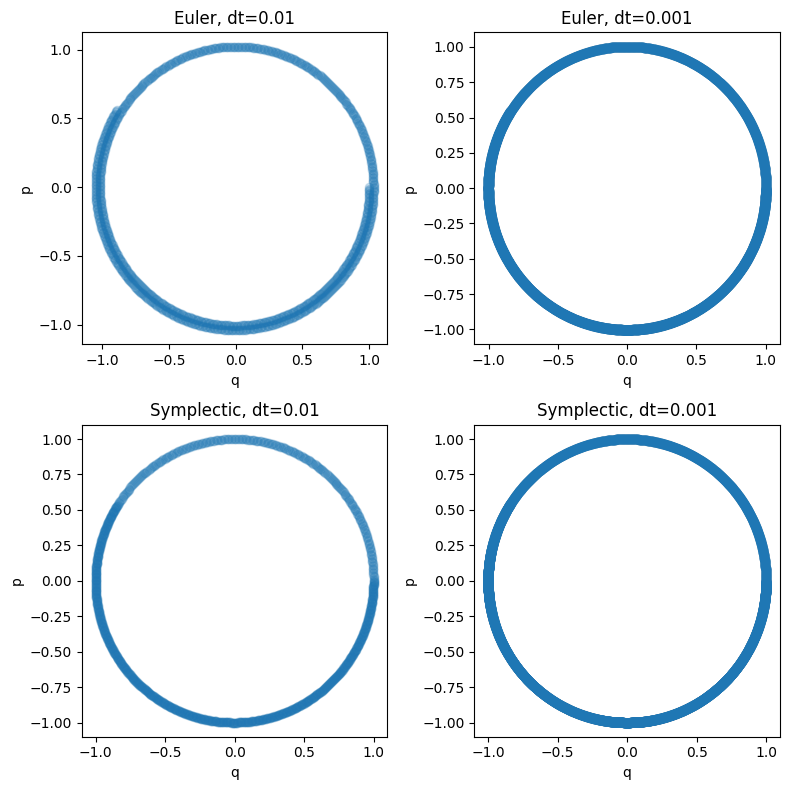

In [3]:
dts = [1e-2, 1e-3]
symps= [False, True]  # False=Euler, True=Symplectic

fig1, axes1 = plt.subplots(2, 2, figsize=(8, 8))

for i, symp in enumerate(symps):
    for j, dt in enumerate(dts):
        qps, H, Hprime = Integrator(dt, symp)
        ax = axes1[i, j]
        ax.scatter(qps[0], qps[1], alpha=0.2)
        ax.set_xlabel('q')
        ax.set_ylabel('p')
        title = f"{'Symplectic' if symp else 'Euler'}, dt={dt}"
        ax.set_title(title)
plt.tight_layout()
#plt.show()
plt.savefig("phase_space_132.png")

# H and H' plots

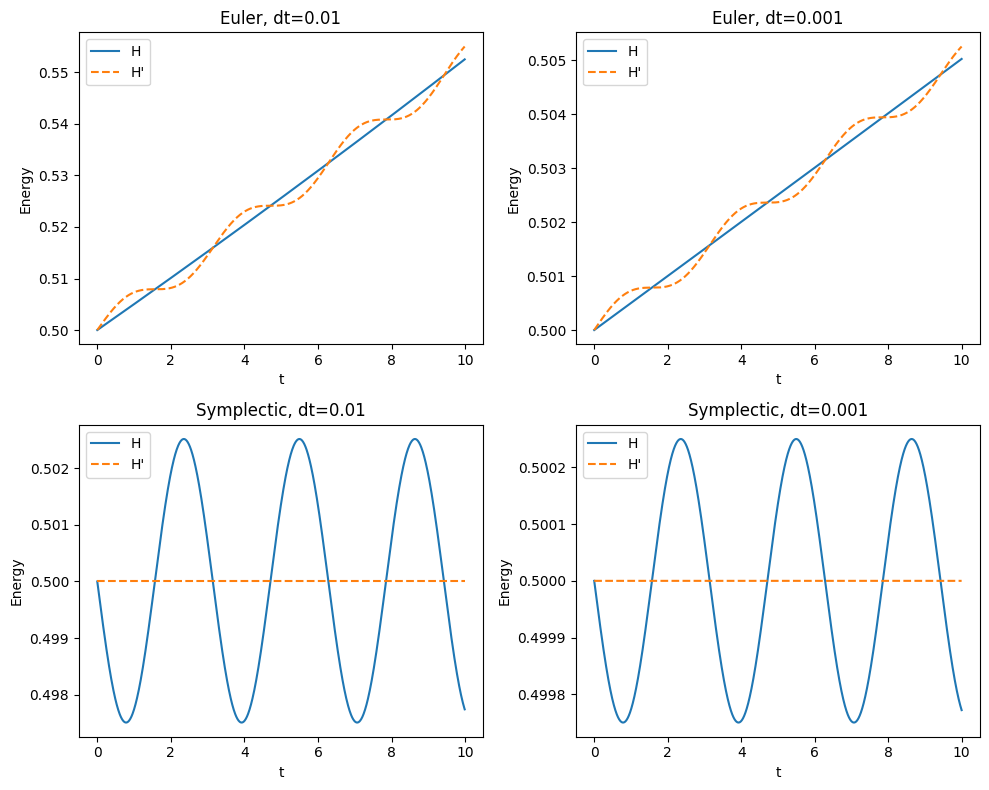

In [4]:
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))

for i, symp in enumerate(symps):
    for j, dt in enumerate(dts):
        qps, H, Hprime = Integrator(dt, symp)
        t = np.arange(len(H)) * dt
        ax = axes2[i, j]
        ax.plot(t, H, label='H', color='tab:blue')
        ax.plot(t, Hprime, label="H'", color='tab:orange', linestyle='--')
        ax.set_xlabel('t')
        ax.set_ylabel('Energy')
        title = f"{'Symplectic' if symp else 'Euler'}, dt={dt}"
        ax.set_title(title)
        ax.legend()

plt.tight_layout()
plt.savefig("energy_132.png")
plt.show()